# Contents
- [Law Of Large Numbers](#Law-Of-Large-Numbers)
- [Central Limit Theorem](#Central-Limit-Theorem)
- [Simpsons Paradox](#Simpsons-Paradox)
___

# Law of Large Numbers

The **Law of Large Numbers (LLN)**: As the size of a sample increases, the sample mean (average) will converge to the expected value (population mean).

#### Key Points:
- The larger the sample size, the closer the sample mean gets to the true population mean.
- LLN applies to repeated independent experiments, like rolling dice or flipping coins.

#### Examples:
1. In a coin toss, as the number of tosses increases, the proportion of heads converges to 0.5.
2. When rolling a die, the average result converges to the expected value of 3.5 as the number of rolls increases.
3. In estimating the average age in a population, taking larger samples gives a more accurate result.

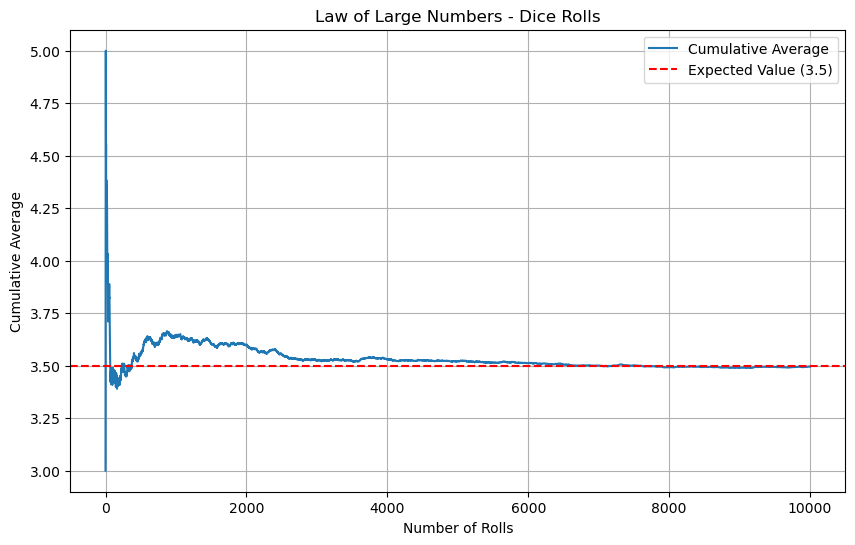

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Number of trials
num_trials = 10000

# Simulate dice rolls
dice_rolls = np.random.randint(1, 7, size=num_trials)

# Compute cumulative averages
cumulative_averages = np.cumsum(dice_rolls) / np.arange(1, num_trials + 1)

# Plot the convergence
plt.figure(figsize=(10, 6))
plt.plot(cumulative_averages, label="Cumulative Average")
plt.axhline(y=3.5, color='r', linestyle='--', label="Expected Value (3.5)")
plt.title("Law of Large Numbers - Dice Rolls")
plt.xlabel("Number of Rolls")
plt.ylabel("Cumulative Average")
plt.legend()
plt.grid()
plt.show()


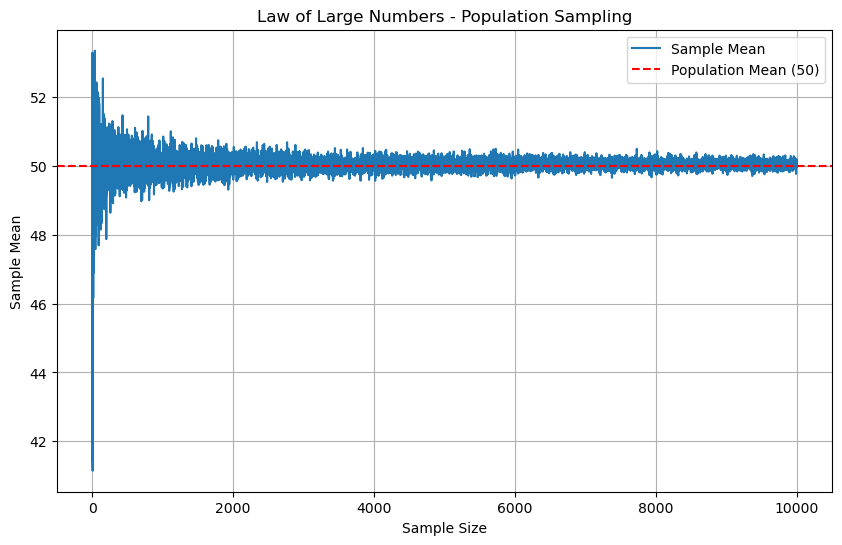

In [12]:
# Generate a population
population_mean = 50
population_std = 10
population = np.random.normal(loc=population_mean, scale=population_std, size=100000)

# Draw increasing sample sizes and compute means
sample_sizes = np.arange(1, 10001)
sample_means = [np.mean(np.random.choice(population, size=n)) for n in sample_sizes]

# Plot the convergence
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, sample_means, label="Sample Mean")
plt.axhline(y=population_mean, color='r', linestyle='--', label="Population Mean (50)")
plt.title("Law of Large Numbers - Population Sampling")
plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")
plt.legend()
plt.grid()
plt.show()


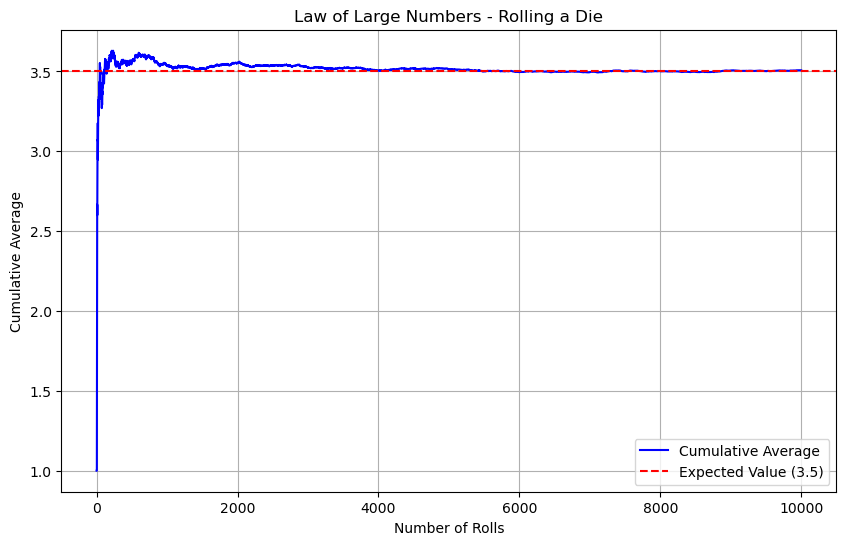

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Number of rolls
num_rolls = 10000

# Simulate die rolls
rolls = np.random.randint(1, 7, size=num_rolls)

# Calculate cumulative averages
cumulative_averages = np.cumsum(rolls) / np.arange(1, num_rolls + 1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(cumulative_averages, label="Cumulative Average", color="blue")
plt.axhline(y=3.5, color='red', linestyle='--', label="Expected Value (3.5)")
plt.title("Law of Large Numbers - Rolling a Die")
plt.xlabel("Number of Rolls")
plt.ylabel("Cumulative Average")
plt.legend()
plt.grid()
plt.show()


### Observations:
1. In both simulations, as the sample size increases:
   - The sample mean converges to the true population mean (or expected value).
2. The convergence is faster for distributions with less variability.
3. The LLN demonstrates that larger samples are more reliable for estimating population parameters.


___
[Back to the top](#Contents)

# Central Limit Theorem

The **Central Limit Theorem (CLT)** is a fundamental concept in statistics that explains the behavior of sample means when drawing random samples from a population. The Central Limit Theorem states that:
1. When you take random samples of size \(n\) from a population with any distribution (e.g., skewed, uniform, etc.), the distribution of the sample means will tend to be approximately normal (bell-shaped) as the sample size becomes large.
2. This result holds regardless of the shape of the population distribution.

#### Key Components:
- **Population Mean (μ):** The average value in the population.
- **Population Standard Deviation (σ):** The spread or variability in the population.
- **Sample Mean (x̄):** The average value in a random sample.
- **Sampling Distribution of the Sample Mean:** The distribution of sample means from all possible samples of size \( n \).

#### Why is the CLT Important?
1. It allows us to use the properties of the normal distribution even if the population distribution is unknown or non-normal.
2. It provides the foundation for many statistical methods, including hypothesis testing and confidence intervals.
3. It ensures that sample means are predictable and centered around the population mean.

#### Conditions for the CLT:
1. The samples must be **randomly selected**.
2. The sample size ($n$) should be sufficiently large. As a rule of thumb, \( $n$ > 30 \) is often sufficient, but heavily skewed distributions may require larger samples.
3. The samples should be **independent** of each other.

#### Formula for Standard Error of the Mean:
The standard deviation of the sampling distribution of the sample mean, known as the **Standard Error (SE)**, is given by:

$$
SE = \frac{\sigma}{\sqrt{n}}
$$

Where:
- $\sigma$: The standard deviation of the population.
- $n$: The sample size.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Parameters
population_mean = 35  # The mean (average) value of the simulated population.
population_std = 15 # The standard deviation of the population, indicating how spread out.
sample_size = 50 # The number of individuals (data points) in each random sample drawn from the population.
num_samples = 10000 # The total number of samples to draw from the population.
num_bins = 30 # The number of bins (intervals) used to create histograms for visualizing the distributions.

In [10]:
# Distributions to plot
distributions = {
    "Exponential": lambda: np.random.exponential(scale=population_std, size=100000) + population_mean,
    "Uniform": lambda: np.random.uniform(low=population_mean - 3*population_std, 
                                         high=population_mean + 3*population_std, size=100000),
    "Normal": lambda: np.random.normal(loc=population_mean, scale=population_std, size=100000),
    "Lognormal": lambda: np.random.lognormal(mean=np.log(population_mean), sigma=0.5, size=100000),
    "Poisson": lambda: np.random.poisson(lam=population_mean, size=100000),
    "Chi-Square": lambda: np.random.chisquare(df=10, size=100000),
    "Beta": lambda: np.random.beta(a=2, b=5, size=100000) * 70  # Scale beta for a better range
}

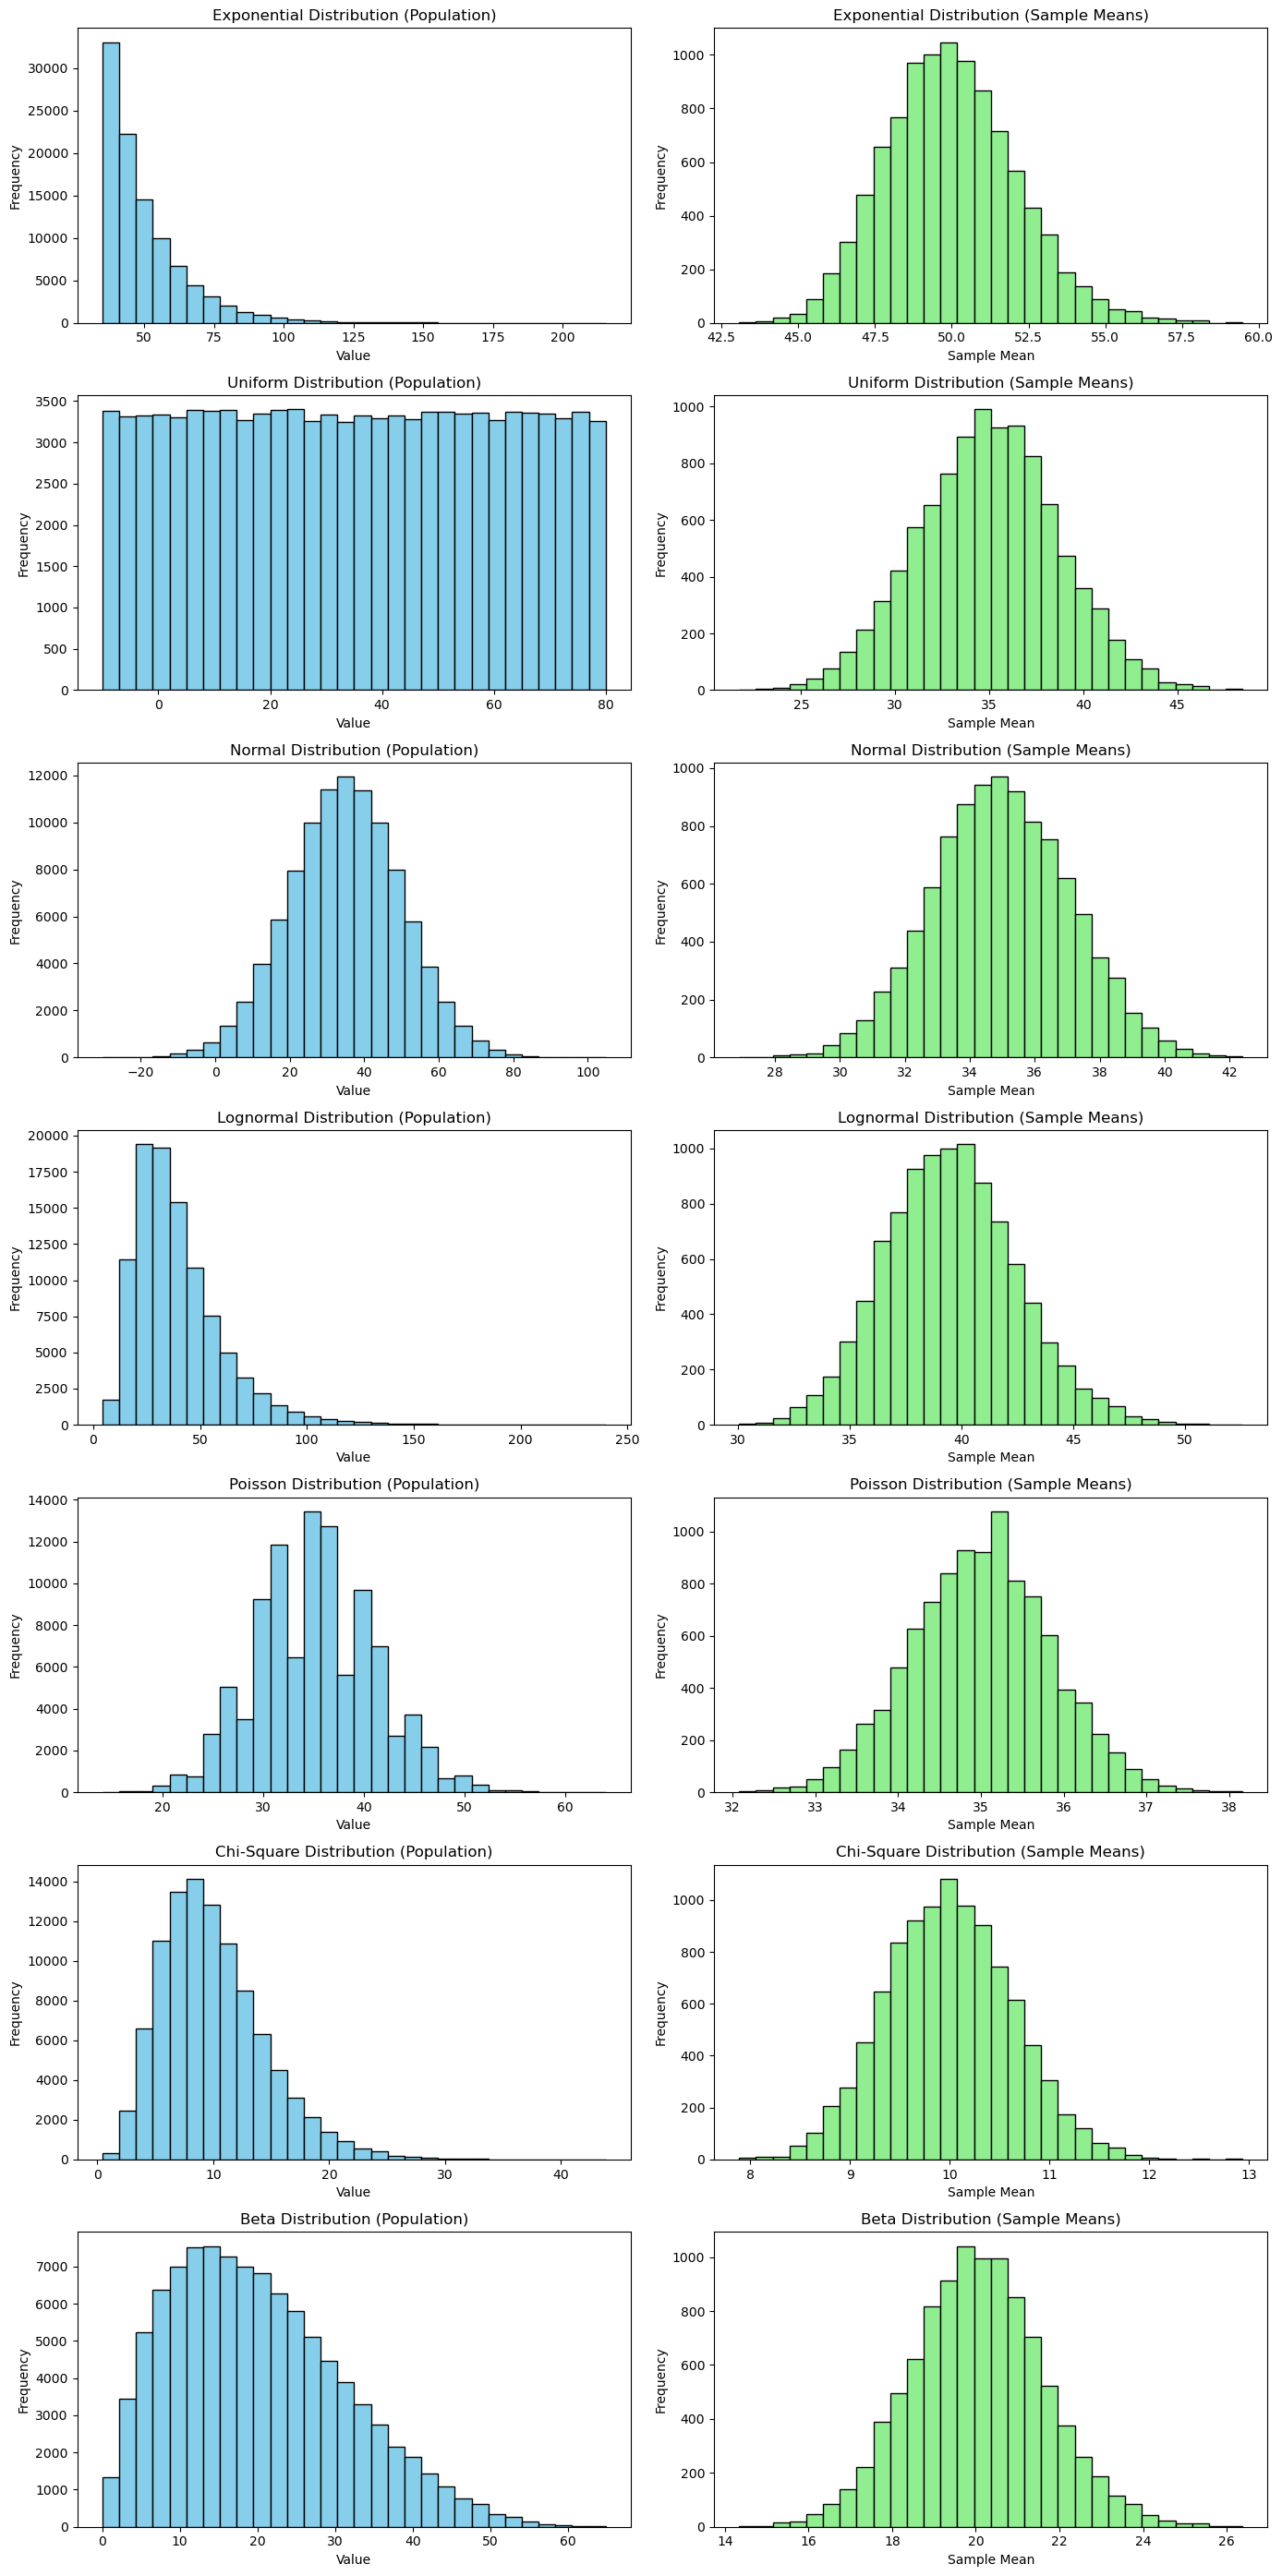

In [5]:
# Initialize the figure
fig, axes = plt.subplots(len(distributions), 2, figsize=(14, 4 * len(distributions)))

# Iterate through distributions
for i, (dist_name, dist_func) in enumerate(distributions.items()):
    # Generate population data
    population = dist_func()
    
    # Collect sample means
    sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]
    
    # Plot the population distribution
    axes[i, 0].hist(population, bins=num_bins, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'{dist_name} Distribution (Population)')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')
    
    # Plot the sample means distribution
    axes[i, 1].hist(sample_means, bins=num_bins, color='lightgreen', edgecolor='black')
    axes[i, 1].set_title(f'{dist_name} Distribution (Sample Means)')
    axes[i, 1].set_xlabel('Sample Mean')
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

___
[Back to the top](#Contents)

# Simpsons Paradox

Simpson's Paradox occurs when a trend observed in individual groups disappears or reverses when the groups are combined. This often happens due to differences in group sizes or confounding variables.

#### Example:
Imagine you're testing two versions of a website:
- **Website 1** (current design).
- **Website 2** (new design).

You measure the **conversion rates** (percentage of users who make a purchase) for each website on two platforms:
- **Mobile** users.
- **Desktop** users.

#### Observations:
1. On **Mobile**, both websites perform equally well.
2. On **Desktop**, Website 1 performs better.
3. However, when combining data across both platforms, Website 2 appears to perform better.

This apparent contradiction demonstrates Simpson's Paradox and highlights the importance of analyzing group-level data.

#### Goals:
1. Analyze conversion rates for Website 1 and Website 2 by platform.
2. Compute overall conversion rates.
3. Visualize and explain Simpson's Paradox.

In [8]:
import pandas as pd

# Data for each platform and channel
data = {
    "Platform": ["Twitter", "Twitter", "Instagram", "Instagram"],
    "Channel": ["Mobile", "Web", "Mobile", "Web"],
    "Visitors": [10000, 2000, 2000, 10000],
    "Conversions": [1000, 150, 300, 1200]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate conversion rate for each platform and channel
df["Conversion Rate"] = df["Conversions"] / df["Visitors"] * 100

# Display individual conversion rates
print("Individual Conversion Rates by Platform and Channel:")
print(df)

# Combine data by channel
combined = df.groupby("Channel").sum()
combined["Conversion Rate"] = combined["Conversions"] / combined["Visitors"] * 100

# Display combined conversion rates
print("\nCombined Conversion Rates by Channel:")
print(combined)


Individual Conversion Rates by Platform and Channel:
    Platform Channel  Visitors  Conversions  Conversion Rate
0    Twitter  Mobile     10000         1000             10.0
1    Twitter     Web      2000          150              7.5
2  Instagram  Mobile      2000          300             15.0
3  Instagram     Web     10000         1200             12.0

Combined Conversion Rates by Channel:
         Visitors  Conversions  Conversion Rate
Channel                                        
Mobile      12000         1300        10.833333
Web         12000         1350        11.250000


/var/folders/dg/01ppfw3n6_jbnx4xdx0vdmj40000gn/T/ipykernel_3314/3142075904.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combined = df.groupby("Channel").sum()


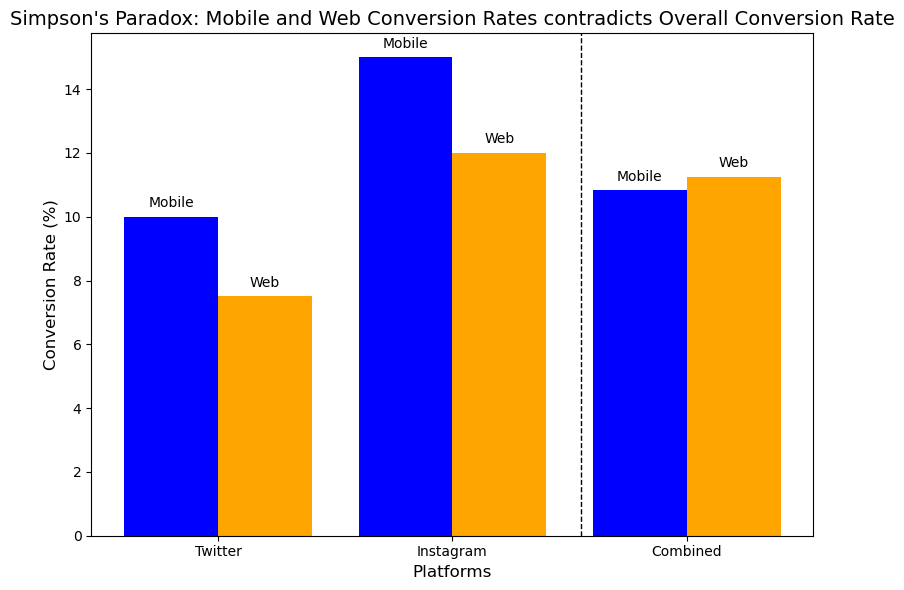

In [7]:
# Adjust the code to add vertical lines and bar labels

plt.figure(figsize=(8, 6))
x = range(len(platforms))  # x-axis positions

# Bar plot for mobile and web rates
bars1 = plt.bar(x, mobile_rates, width=0.4, label="Mobile", align='center', color='blue')
bars2 = plt.bar([p + 0.4 for p in x], web_rates, width=0.4, label="Web", align='center', color='orange')

# Add text labels for categories (Mobile, Web)
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height() + 0.3, 'Mobile', ha='center', fontsize=10)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height() + 0.3, 'Web', ha='center', fontsize=10)

# Add vertical line before "Combined" category
plt.axvline(x=1.75, color='black', linestyle='--', linewidth=1)

# Customize plot labels and title
plt.xlabel("Platforms", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)
plt.title("Simpson's Paradox: Mobile and Web Conversion Rates contradicts Overall Conversion Rate", fontsize=14)
plt.xticks([p + 0.2 for p in x], platforms, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


___
[Back to the top](#Contents)